# Canny特征提取实验

## 实验目的
试编程实现Canny边缘检测算法，并在下图进行测试。

![lena](lena.png)

## 实验环境
- MatPlotLib
- OpenCV2

## 实验原理

Canny边缘检测是一种广泛使用的边缘检测算法，主要包含四个步骤：降噪、计算梯度、非极大值抑制和双阈值法。其原理是通过图像梯度分析边缘强度和方向，然后应用抑制和阈值筛选以保留显著的边缘。
### 降噪

Canny边缘检测的第一步是对图像进行降噪处理，以去除高频噪声，避免干扰边缘检测。通常使用高斯滤波器来平滑图像。设图像为$I(x, y)$，高斯核为$G(x, y)$，平滑图像$S(x, y)$由以下卷积计算得到：

$$
S(x, y) = I(x, y) * G(x, y)
$$

其中，$G(x, y)$表示二维高斯函数：
$$
G(x, y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$

这里的$\sigma$为高斯核的标准差，它控制平滑程度。较大的$\sigma$会导致更平滑的结果，但可能会模糊一些细小的边缘。

### 计算梯度

在平滑后的图像$S(x, y)$上，计算每个像素点的梯度大小和方向。梯度大小和方向用来描述边缘的强度和方向性。图像的梯度可以通过Sobel算子来计算，Sobel算子定义如下：

1. **水平方向（0°）**：
   用于检测水平方向的边缘变化，常用于检测左右的边界。通常定义为：
   $$
   G_x = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}
   $$

2. **垂直方向（90°）**：
   用于检测垂直方向的边缘变化，常用于检测上下的边界。定义为：
   $$
   G_y = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}
   $$

3. **正对角线方向（45°）**：
   用于检测45°方向上的边缘变化。常用于检测从左上到右下的边界。定义为：
   $$
   G_{45} = \begin{bmatrix} 0 & 1 & 2 \\ -1 & 0 & 1 \\ -2 & -1 & 0 \end{bmatrix}
   $$

4. **反对角线方向（135°）**：
   用于检测135°方向上的边缘变化，常用于检测从右上到左下的边界。定义为：
   $$
   G_{135} = \begin{bmatrix} 2 & 1 & 0 \\ 1 & 0 & -1 \\ 0 & -1 & -2 \end{bmatrix}
   $$


### 非极大值抑制

在计算出梯度后，为了精确定位边缘，Canny算法进行非极大值抑制。非极大值抑制的目的是去除边缘上的一些非边缘点，即只保留具有局部最大梯度的点。具体来说，对于每个像素点，其梯度方向$\theta$将被近似为0°、45°、90°或135°四个主方向，分别对应水平、对角、垂直或反对角方向。

假设当前像素点梯度方向上的相邻两个像素点梯度值分别为$G_1$和$G_2$，如果当前点的梯度值$G$小于$G_1$或$G_2$，则将该像素置为0，否则保留该像素的梯度值。

### 双阈值

经过非极大值抑制后，图像中可能还包含一些不明显的边缘。因此，Canny算法最后一步应用双阈值处理来进一步筛选边缘。设置高阈值$T_h$和低阈值$T_l$，并对梯度值分为三类：

- 如果某个像素的梯度值$G \geq T_h$，则将其标记为强边缘。
- 如果$T_l \leq G < T_h$，则将其标记为弱边缘。
- 如果$G < T_l$，则将其置为非边缘（值设为0）。

在后续处理时，任何连接到强边缘的弱边缘也会被保留为边缘，而独立的弱边缘则被丢弃。

在`OpenCV`中，后三个过程可以通过`cv2.Canny`完成，主要参数如下：

- `image`：输入的单通道图像，一般为灰度图像。

- `threshold1`：低阈值（`T_l`），用于双阈值边缘连接处理，通常用于抑制较弱的边缘。

- `threshold2`：高阈值（`T_h`），用于双阈值边缘连接处理，较高的阈值可以确定更强的边缘。

- `apertureSize`：Sobel 算子使用的窗口大小，默认为3，表示使用3x3的窗口。如果需要更大的窗口可以设置为5或7。

## 实验过程
读取示例图像，先进行去噪再使用`cv2.Canny`进行边缘提取，阈值先采用Otsu算法自动选取。

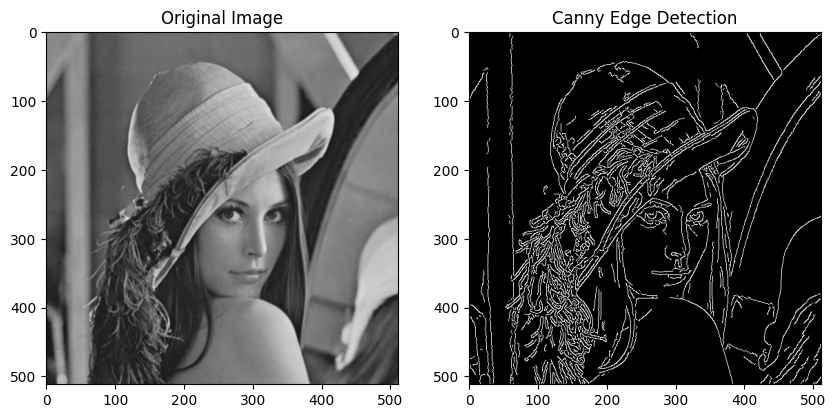

In [5]:
import cv2
import matplotlib.pyplot as plt

# 读取图像并转换为灰度
image = cv2.imread('lena.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 高斯模糊处理
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# 应用Canny边缘检测
high_thresh, _ = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
high_thresh *= 0.6
low_thresh = 0.4 * high_thresh
edges = cv2.Canny(blurred, threshold1=low_thresh, threshold2=high_thresh)

# 显示结果
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Canny Edge Detection')
plt.imshow(edges, cmap='gray')

plt.show()

可以看到，高阈值选取为Otsu阈值的0.6倍，低阈值为高阈值的0.4倍时，边缘可以被较好提取，但存在头发、帽子边缘提取过多，以及帽顶边缘提取不连续的问题。